In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import vae

error creating /mnt/gfs/gv1/project_sonar_data/seti/resized_images_seti/256258
folder exists, make sure this call is from inference.py


In [2]:
from sklearn import metrics

import config
import dataset
import seedandlog
import os

from tqdm import tqdm
torch.multiprocessing.set_sharing_strategy('file_system')

seedandlog.seed_torch(seed=config.SEED)

data_path = config.DATA_PATH
device = config.DEVICE
bs = config.BATCH_SIZE
target_size = config.TARGET_SIZE

saved_model_name = config.SAVED_MODEL_NAME

In [3]:


model = vae.VAE()
model.to(device)
states = [torch.load(f'{config.MODEL_OUTPUT_PATH}loss_fold{fold}_{saved_model_name}.pth') for fold in range(1)]


 Using legacy_seresnet18 as backbone, backbone head: Linear(in_features=512, out_features=1000, bias=True)



In [4]:
def get_test_file_path(image_id):
    if config.ORIG_IMAGE:
        return f"{data_path}train/{image_id[0]}/{image_id}.npy"
    else:
        return f"{config.RESIZED_IMAGE_PATH}train/{image_id}.npy"

if config.DEBUG:
    inference_df = pd.read_csv(data_path+'train_labels.csv')[:10]
else:
    inference_df = pd.read_csv(data_path+'train_labels.csv')

inference_df['image_path'] = inference_df['id'].apply(get_test_file_path)

In [5]:
inputs = dataset.SetiDataset(image_paths = inference_df['image_path'].values.tolist(), ids = inference_df.index.values.tolist())

model.load_state_dict(states[0]['model']) 


<All keys matched successfully>

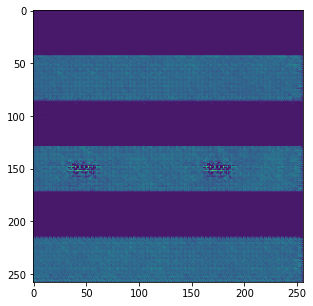

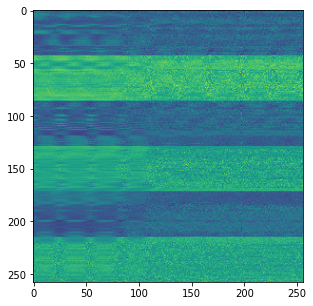

In [6]:
recon_x, x, mu, log_var, z = model(inputs[np.random.choice(np.arange(10))]['images'].view(-1,3,258,256).to('cuda'))
recon_x = np.array(recon_x.cpu().detach().numpy())
x = np.array(x.cpu().detach().numpy())

plt.figure(figsize=(5,5))
plt.imshow(recon_x[0][2])
plt.figure(figsize=(5,5))
plt.imshow(x[0][2])

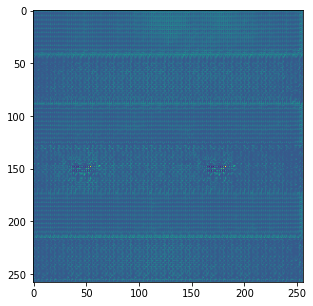

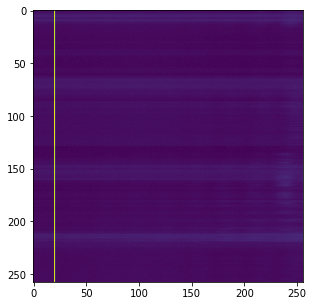

In [17]:
recon_x, x, mu, log_var, z = model(inputs[np.random.choice(np.arange(1000))]['images'].view(-1,3,258,256).to('cuda'))
recon_x = np.array(recon_x.cpu().detach().numpy())
x = np.array(x.cpu().detach().numpy())

plt.figure(figsize=(5,5))
plt.imshow(recon_x[0][1])
plt.figure(figsize=(5,5))
plt.imshow(x[0][1])

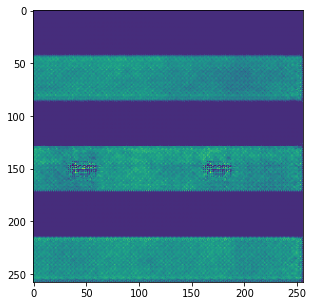

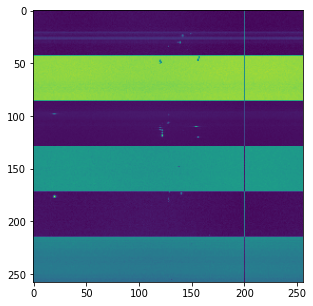

In [8]:
recon_x, x, mu, log_var, z = model(inputs[np.random.choice(np.arange(1000))]['images'].view(-1,3,258,256).to('cuda'))
recon_x = np.array(recon_x.cpu().detach().numpy())
x = np.array(x.cpu().detach().numpy())

plt.figure(figsize=(5,5))
plt.imshow(recon_x[0][0])
plt.figure(figsize=(5,5))
plt.imshow(x[0][0])

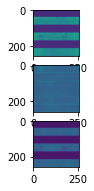

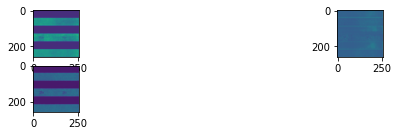

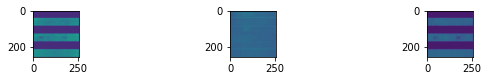

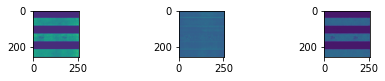

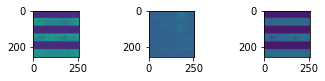

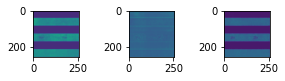

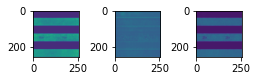

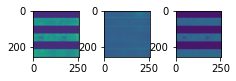

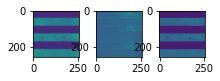

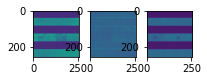

In [9]:
for i in range(10):
    recon_x, x, mu, log_var, z = model(inputs[i]['images'].view(-1,3,258,256).to('cuda'))
    recon_x = np.array(recon_x.cpu().detach().numpy())
    x = np.array(x.cpu().detach().numpy())
    
    plt.figure(figsize=(10,10))
    plt.subplot(10,i+1,1)
    plt.imshow(recon_x[0][0])
    plt.subplot(10,i+1,2)
    plt.imshow(recon_x[0][1])
    plt.subplot(10,i+1,3)
    plt.imshow(recon_x[0][2])
plt.show()